In [1]:
import numpy as np
data = np.loadtxt('files/chb_1/chb01_04.csv',delimiter=",")

In [2]:
data.shape

(23, 921600)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 100.
time = [i for i in range(len(data[0]))]

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data[0], lw=.1, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.title('N3 sleep EEG data (F3)')
sns.despine()

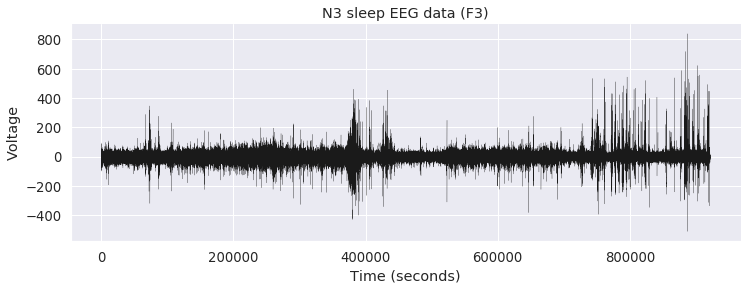

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ff = data[0];

plt.plot(time, ff, lw=.2, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.title('N3 sleep EEG data (F3)')
sns.despine()

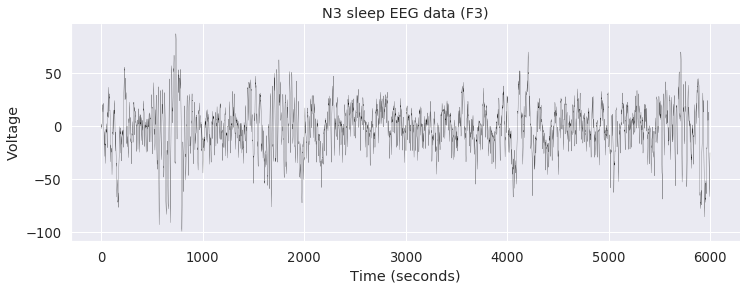

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ff = data[0];

plt.plot(time[1:6000], ff[1:6000], lw=.2, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.title('N3 sleep EEG data (F3)')
sns.despine()

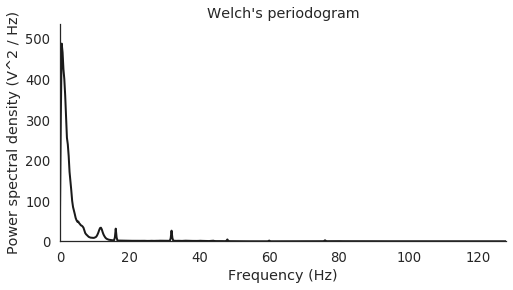

In [7]:
from scipy import signal
sf=256
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data[0], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

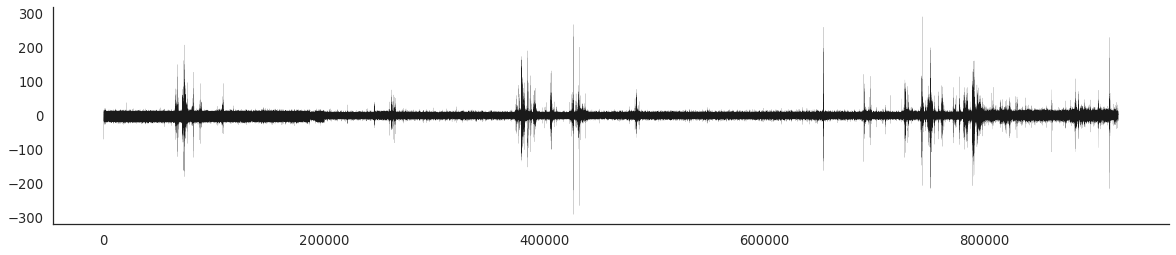

In [23]:
fc = 15  # Cut-off frequency of the filter
w = fc / (sf / 2) # Normalize the frequency

#w1 = (fc-0.5)/(sf / 2) 
#w2 = (fc+0.5)/(sf / 2)
#w = [w1, w2]
b, a = signal.butter(5, w, 'highpass')
output = signal.filtfilt(b, a, data[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, output, lw=.1, color='k')
sns.despine()

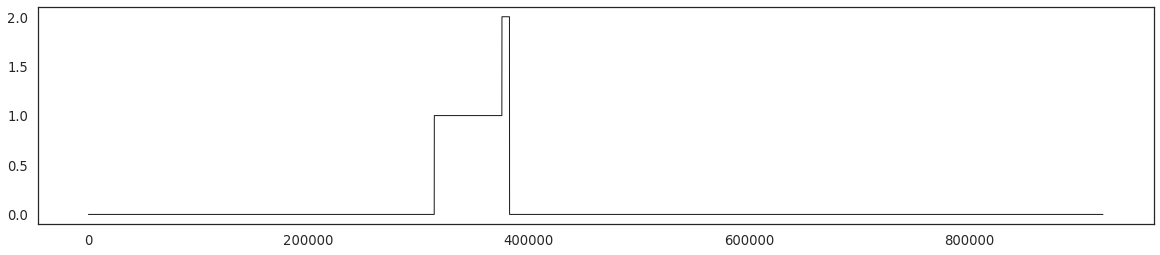

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, marking, lw=1, color='k')

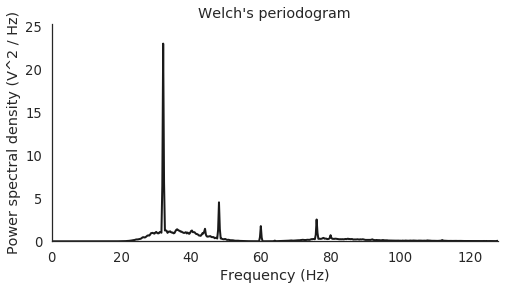

In [17]:
sf=256
# Define window length (4 seconds)
win = 4 * sf
#freqs, psd = signal.welch(data[0][1:8000], sf, nperseg=win)
freqs, psd = signal.welch(output, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

In [21]:
marking = np.loadtxt('files/chb_1/chb01_04_label.csv',delimiter=",")

In [36]:
marking

array([0., 0., 0., ..., 0., 0., 0.])

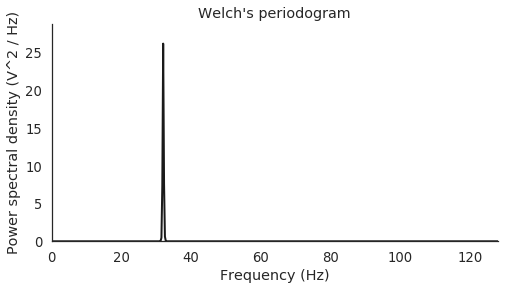

In [22]:
sf=256
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(output, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

In [24]:
import scipy.fftpack

In [25]:
ans=scipy.fftpack.fft(data[0])

In [38]:
print(ans.shape)
print(data[0].shape)

(921600,)
(921600,)


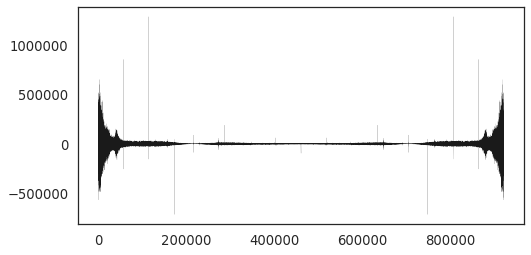

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(ans, lw=.1, color='k')

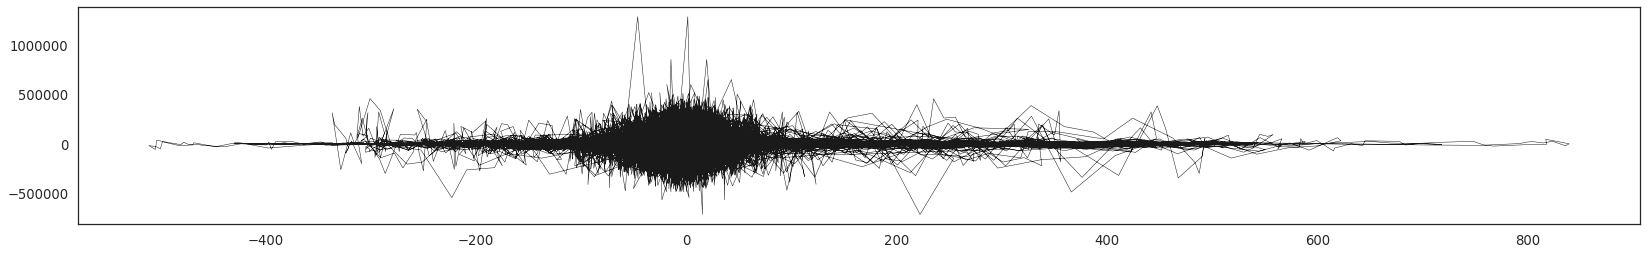

In [37]:
plt.figure(figsize=(28, 4))
plt.plot(data[0],ans, lw=.5, color='k')

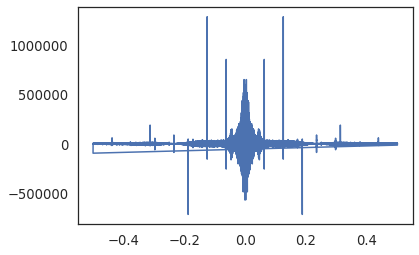

In [31]:
Y    = np.fft.fft(data[0])
freq = np.fft.fftfreq(len(data[0]))
plt.plot(freq,Y)

/home/b160163ec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


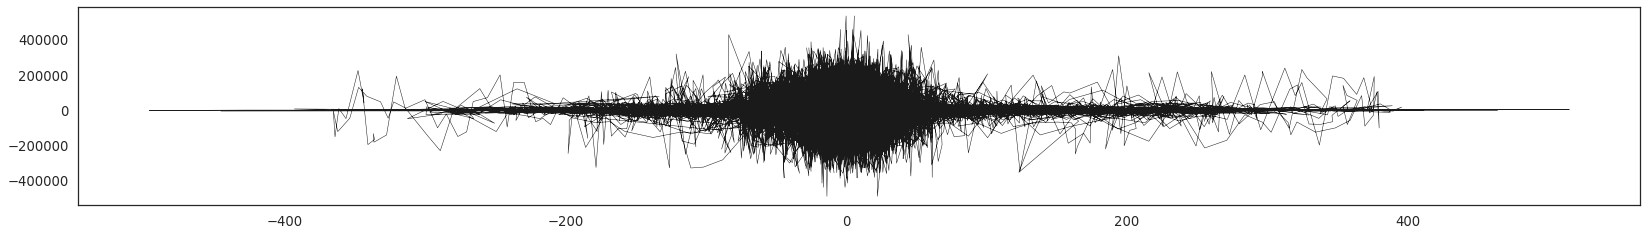

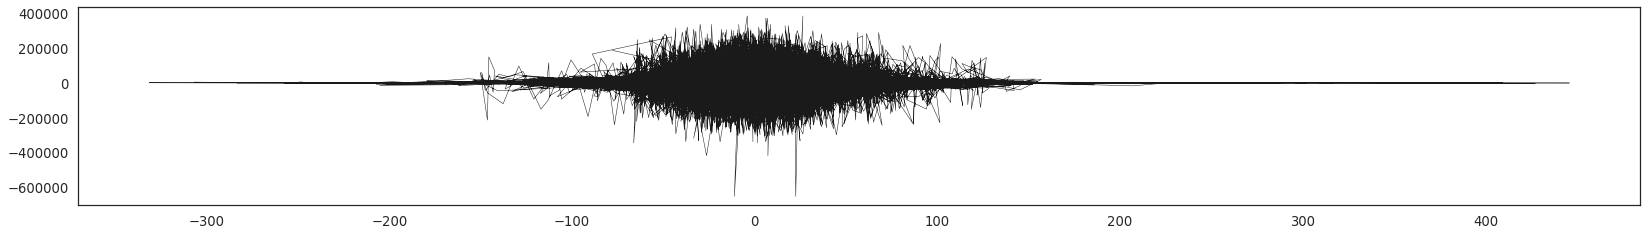

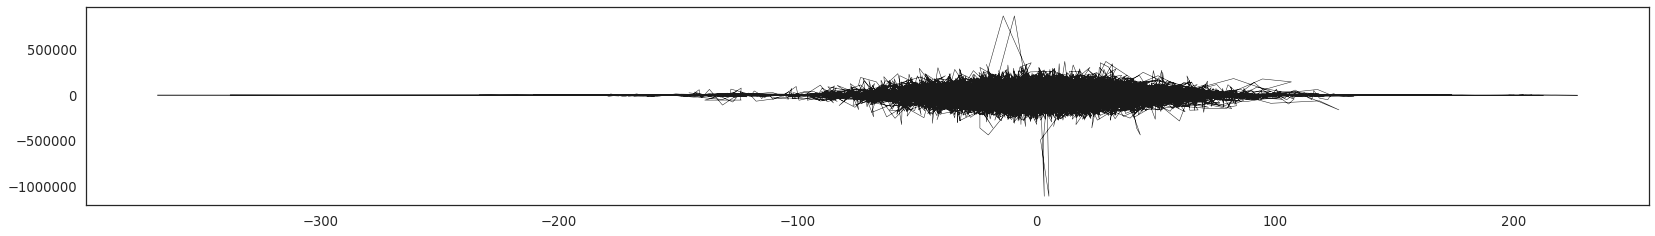

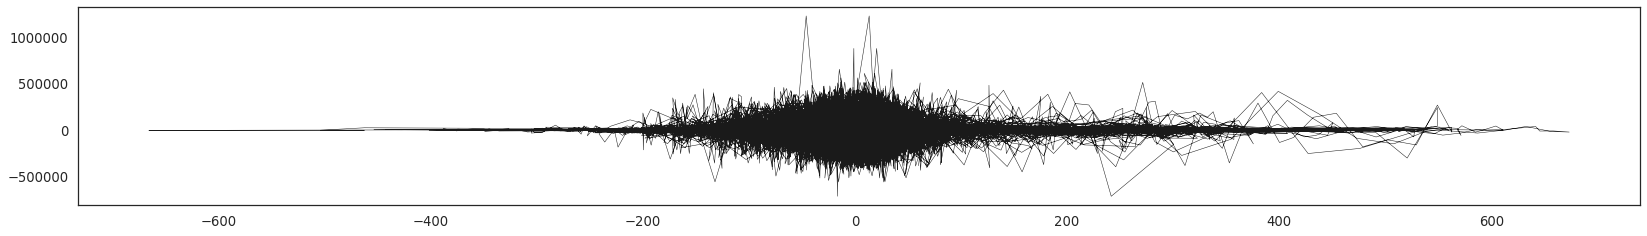

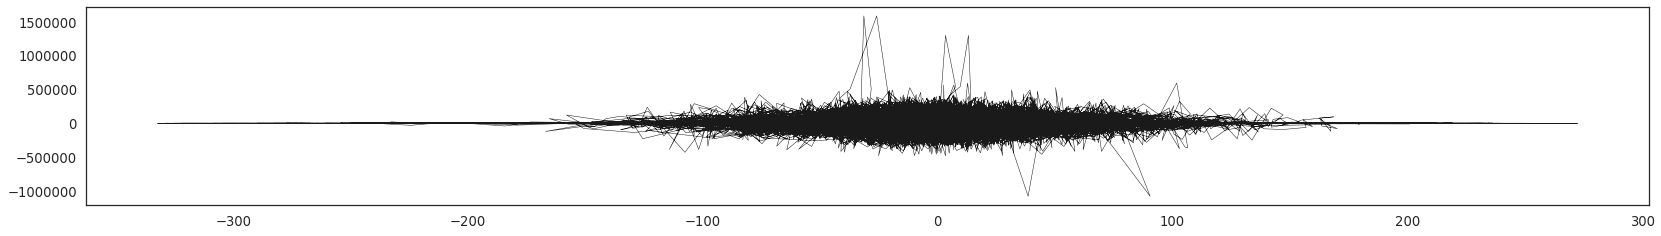

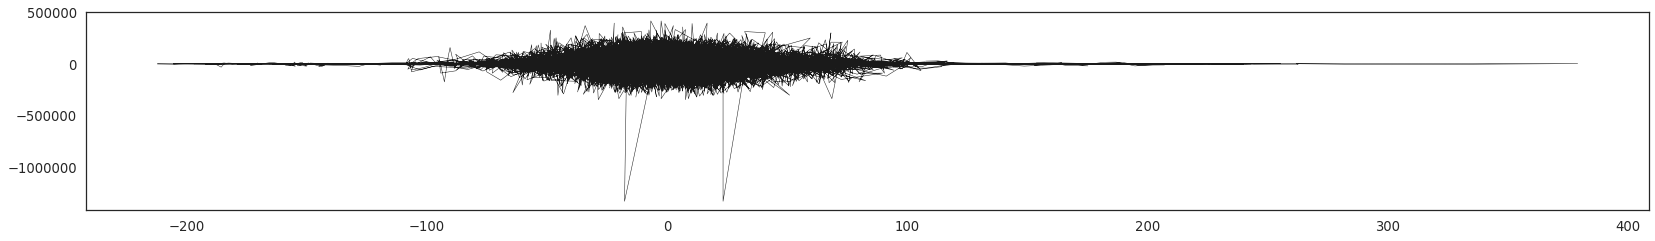

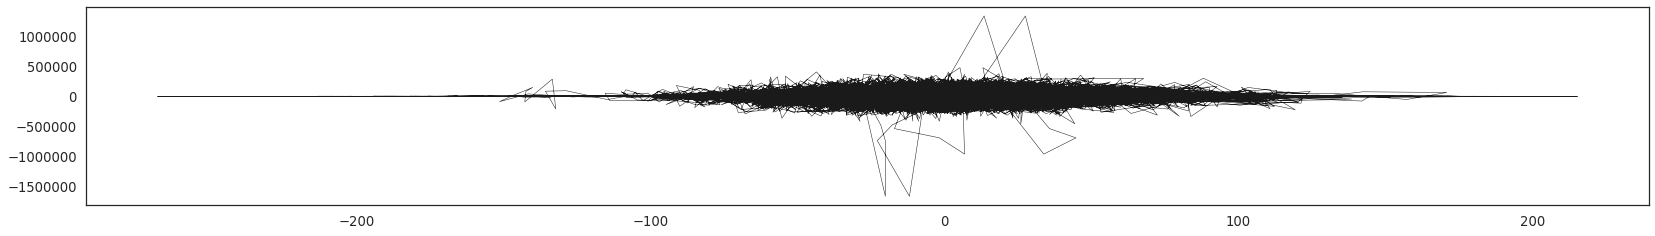

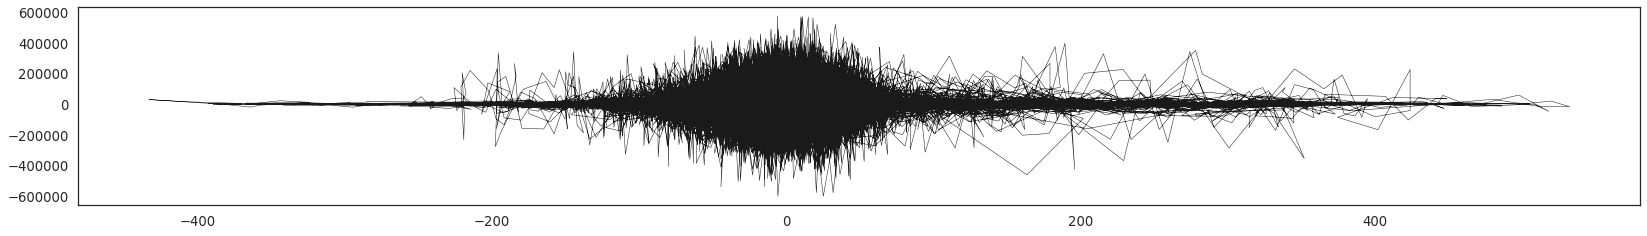

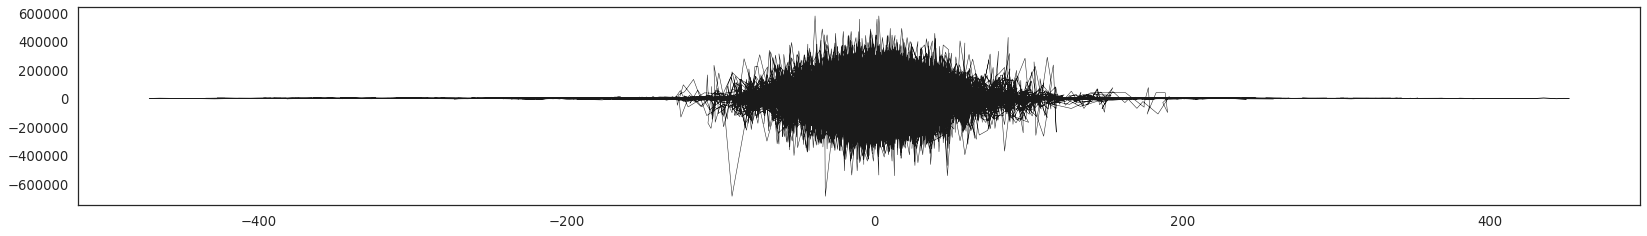

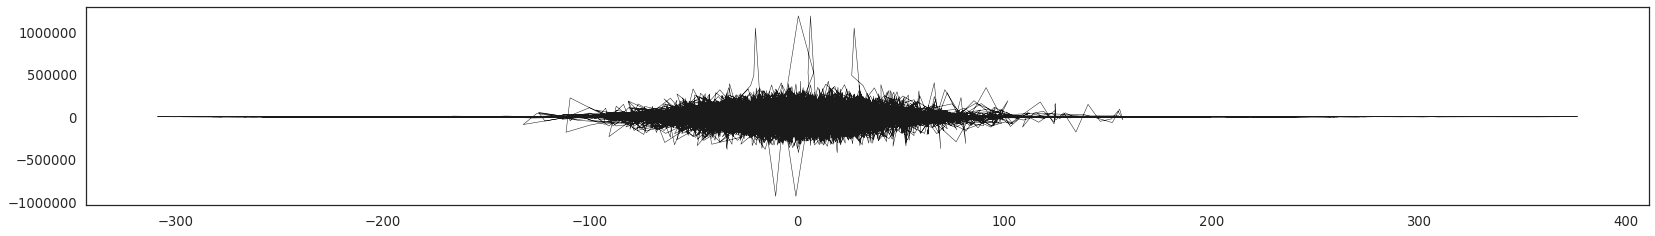

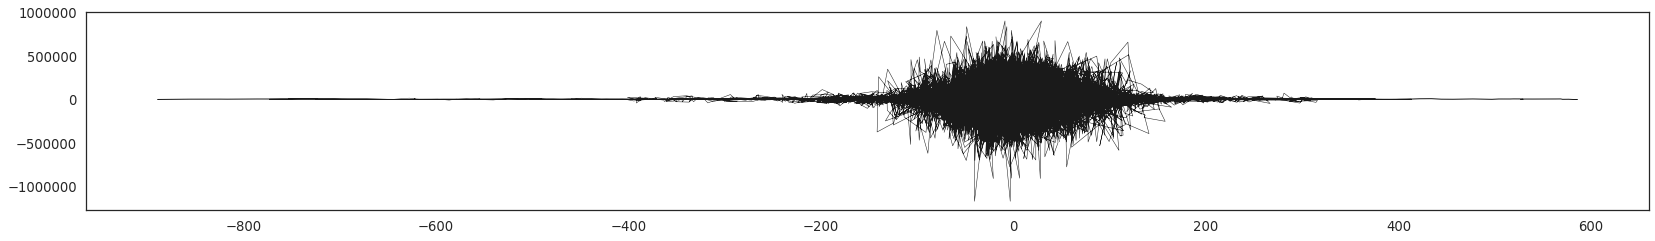

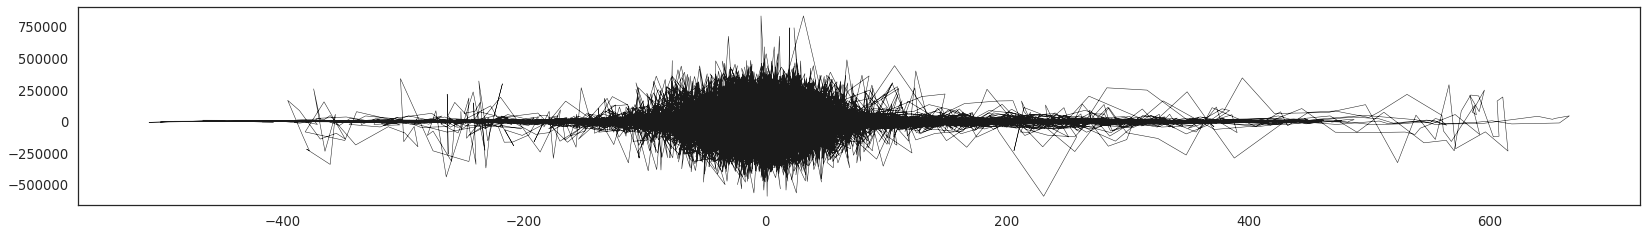

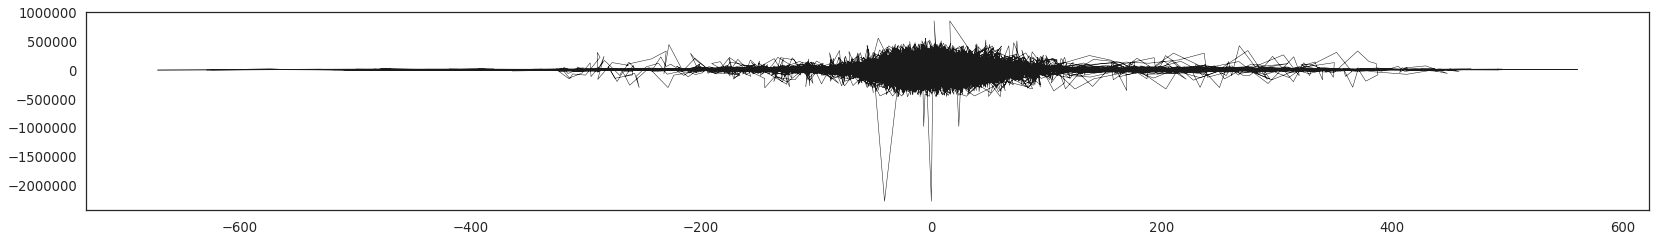

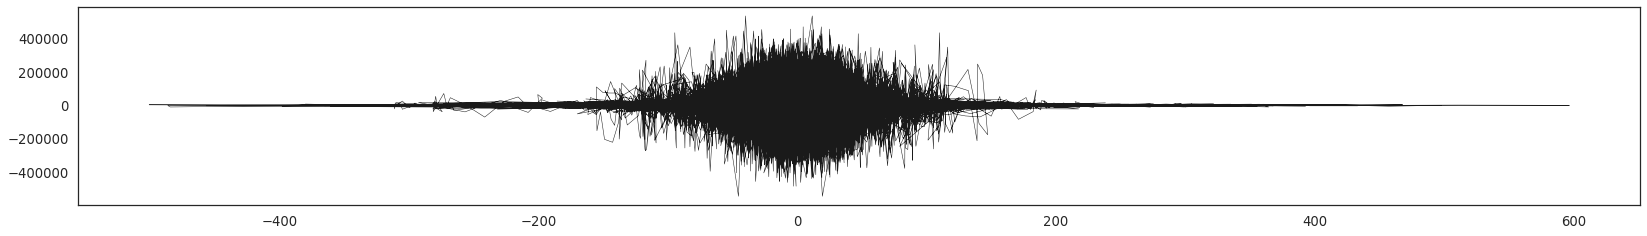

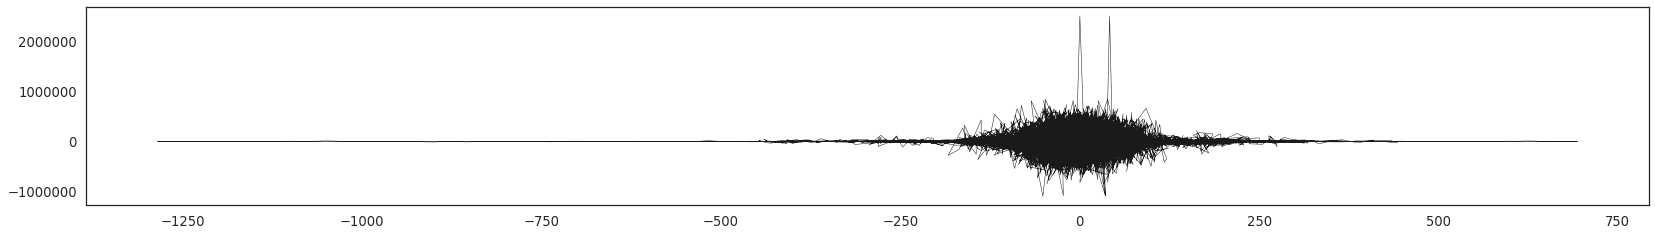

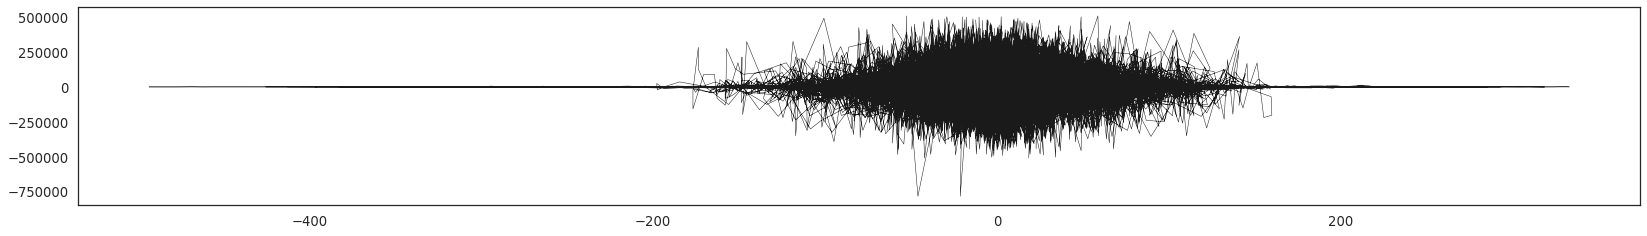

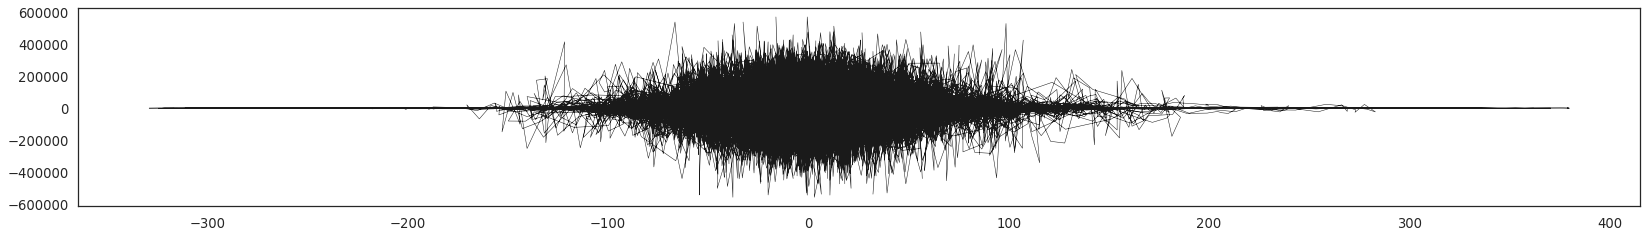

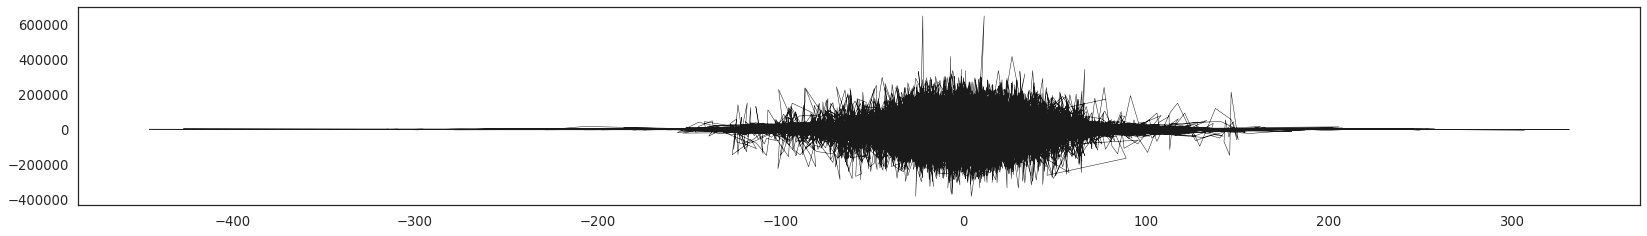

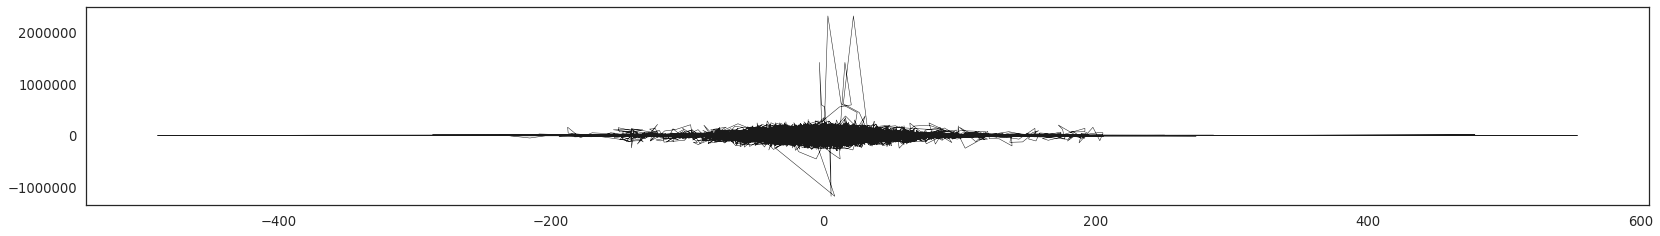

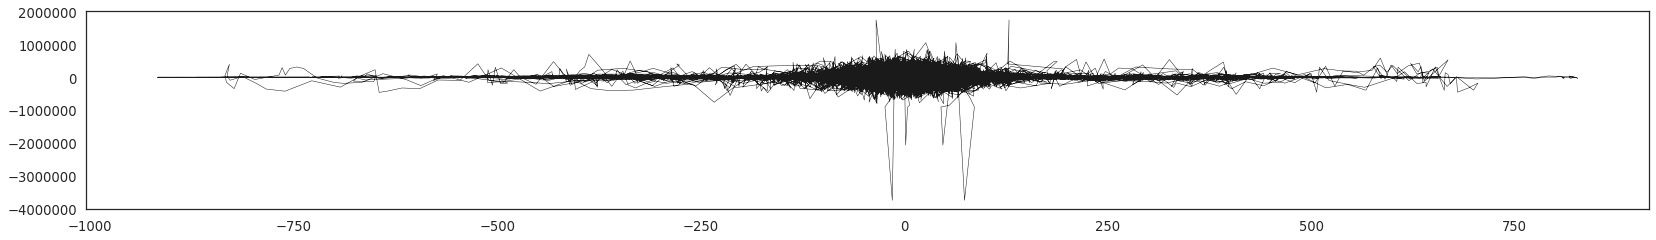

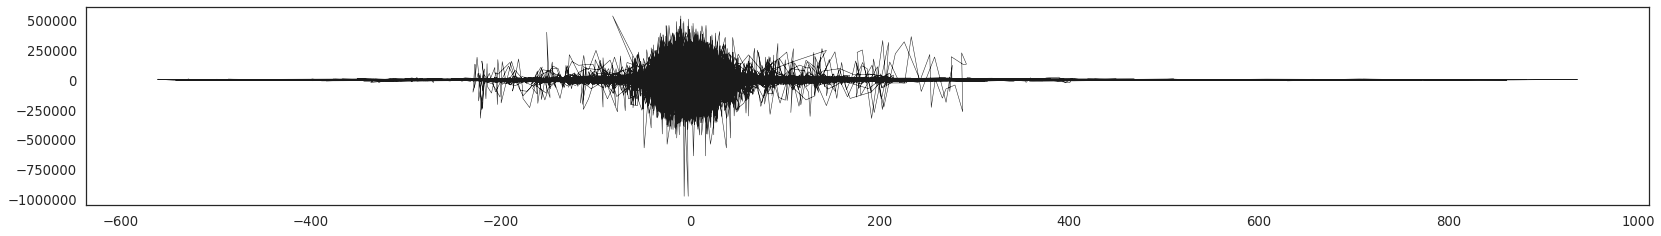

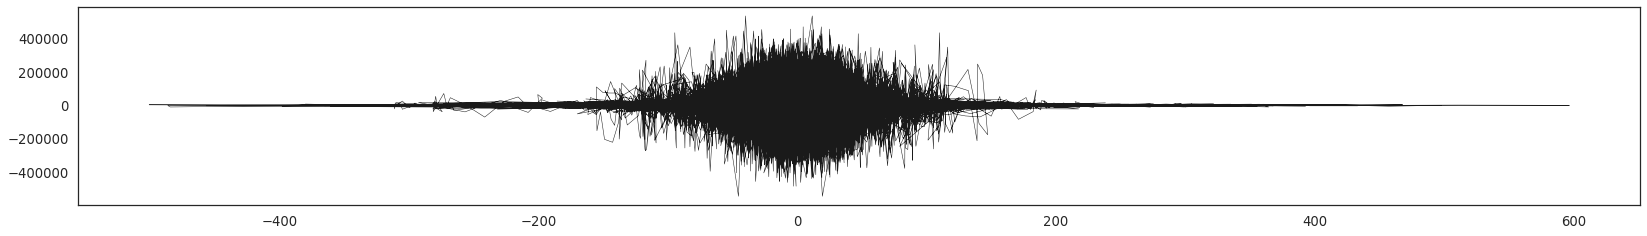

In [43]:
for i in range(1,len(data)):
    ans=scipy.fftpack.fft(data[i])
    plt.figure(figsize=(28, 100))
    plt.subplot(len(data),1,i)
    plt.plot(data[i],ans,lw=.5, color='k')